### 1、一次指数平滑
一次指数平滑又叫简单指数平滑（simple exponential smoothing， SES），适合用来预测没有明显趋势和季节性的时间序列。其预测结果是一条水平的直线。

C:\dev\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


<AxesSubplot:>

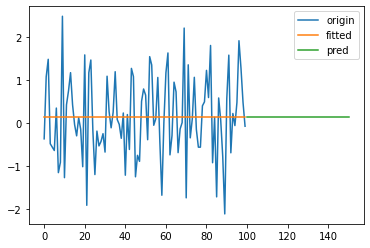

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

x1 = np.linspace(0, 1, 100)
y1 = pd.Series(np.multiply(x1, (x1 - 0.5)) + np.random.randn(100))
ets1 = SimpleExpSmoothing(y1)
r1 = ets1.fit()
pred1 = r1.predict(start=len(y1), end=len(y1) + len(y1)//2)

pd.DataFrame({
    'origin': y1,
    'fitted': r1.fittedvalues,
    'pred': pred1
}).plot(legend=True)


### 2、二次指数平滑
Holt 扩展了简单指数平滑，使其可以用来预测带有趋势的时间序列。直观地看，就是对平滑值的一阶差分（可以理解为斜率）也作一次平滑。模型的预测结果是一条斜率不为0的直线。

C:\dev\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


<AxesSubplot:>

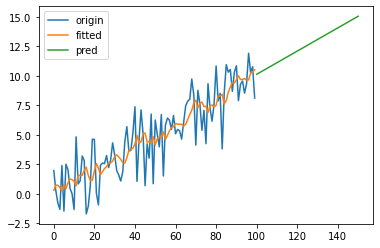

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.holtwinters import Holt

x2 = np.linspace(0, 99, 100)
y2 = pd.Series(0.1 * x2 + 2 * np.random.randn(100))
ets2 = Holt(y2)
r2 = ets2.fit(smoothing_level=0.2)
pred2 = r2.predict(start=len(y2), end=len(y2) + len(y2)//2)

pd.DataFrame({
    'origin': y2,
    'fitted': r2.fittedvalues,
    'pred': pred2
}).plot(legend=True)

### 3、 三次指数平滑

为了描述时间序列的季节性，Holt 和 Winters 进一步扩展了 Holt’s linear trend method，得到了三次指数平滑模型，也就是通常说的 Holt-Winters’ 模型。我们用 m m m 表示“季节”的周期。根据季节部分和非季节部分的组合方式不同，Holt-Winters’ 又可以分为加法模型和乘法模型。

C:\dev\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


<AxesSubplot:>

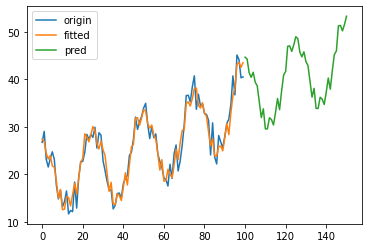

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.holtwinters import ExponentialSmoothing

x3 = np.linspace(0, 4 * np.pi, 100)
y3 = pd.Series(20 + 0.1 * np.multiply(x3, x3) + 8 * np.cos(2 * x3) + 2 * np.random.randn(100))
ets3 = ExponentialSmoothing(y3, trend='add', seasonal='add', seasonal_periods=25)
r3 = ets3.fit()
pred3 = r3.predict(start=len(y3), end=len(y3) + len(y3)//2)

pd.DataFrame({
    'origin': y3,
    'fitted': r3.fittedvalues,
    'pred': pred3
}).plot(legend=True)
